In [1]:
import skimage.io
import sklearn.cluster

import lib.ocr

%matplotlib inline

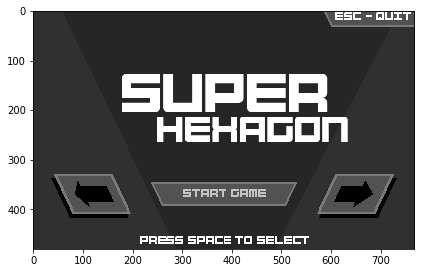

In [2]:
frame = skimage.io.imread("datasets/frame_splash.png")
skimage.io.imshow(frame)

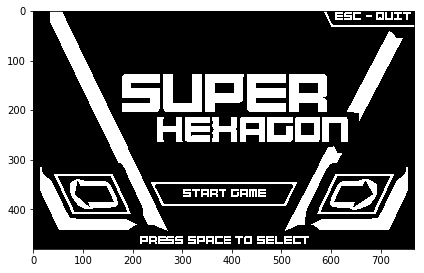

In [3]:
preprocessed_frame = lib.ocr.preprocess_image(frame, mode="PRECISE")
skimage.io.imshow(preprocessed_frame)

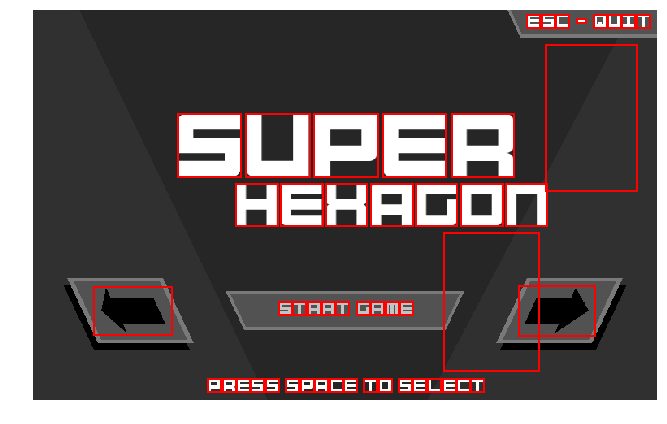

In [13]:
data = lib.ocr.extract_character_and_word_data(
    frame, 
    word_window_shape="rectangle", 
    word_window_size=(1, 1),
    preprocess_mode="PRECISE"
)

data["word"]["bounding_boxes"]

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(frame)

for region_bbox in data["word"]["bounding_boxes"]:
    minr, minc, maxr, maxc = region_bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

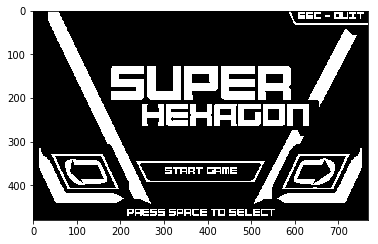

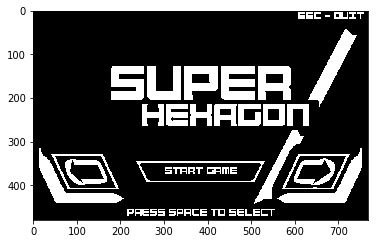

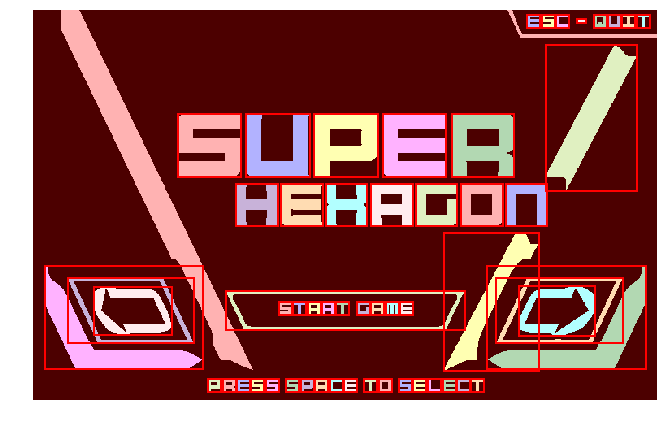

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square, rectangle
from skimage.color import label2rgb

thresh = threshold_otsu(preprocessed_frame)
bw = closing(preprocessed_frame > thresh, rectangle(1, 1))

plt.figure()
plt.imshow(bw, cmap="gray")

cleared = clear_border(bw)

plt.figure()
plt.imshow(cleared, cmap="gray")

label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=preprocessed_frame)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()

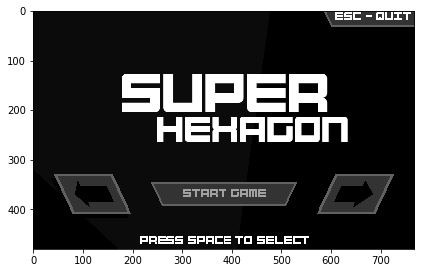

In [6]:
skimage.io.imshow(preprocessed_frame)

In [8]:
objects = lib.ocr.detect_image_objects_closing(preprocessed_frame, window_size=1)

In [9]:
image_data = lib.ocr.normalize_objects(preprocessed_frame, objects[20:29])

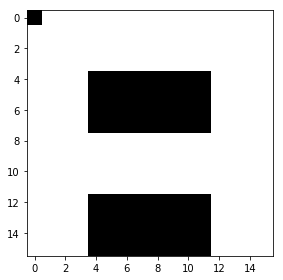

In [12]:
skimage.io.imshow(image_data[2])

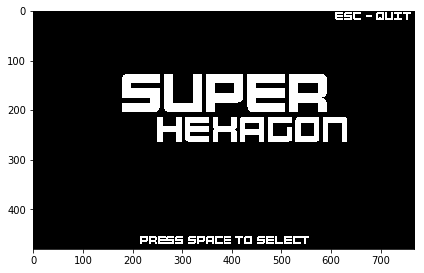

In [23]:

skimage.io.imshow(clear_border(preprocessed_frame))

In [6]:
import numpy as np
from skimage import exposure

from skimage.filters import threshold_otsu
from skimage.morphology import closing, square

def preprocess_image(image):
    print(image.dtype)
    grayscale_image = skimage.color.rgb2gray(image)
    print(grayscale_image.dtype)

    lower, higher = np.percentile(grayscale_image, (5, 95))
    contrast_image = exposure.rescale_intensity(grayscale_image, in_range=(lower, higher))
    
    print(contrast_image.dtype)

    threshold = threshold_otsu(contrast_image)
    bw = closing(contrast_image > threshold, square(1))

    return bw

In [7]:
preprocessed_frame = preprocess_image(frame)

uint8
float64
float64
